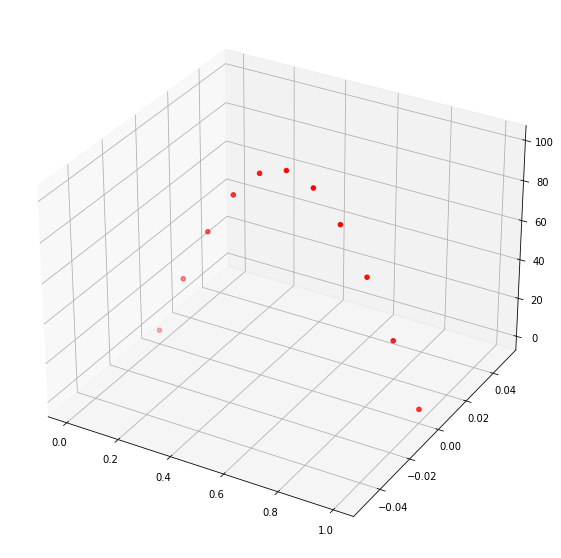

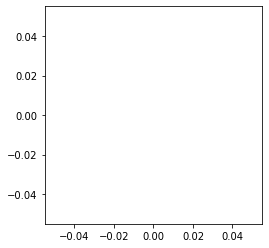

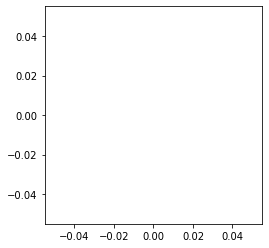

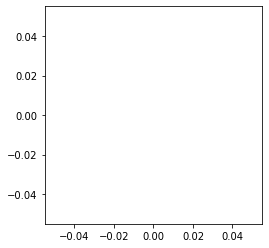

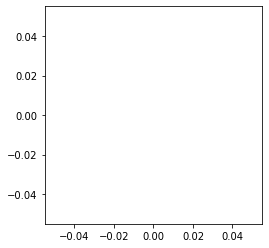

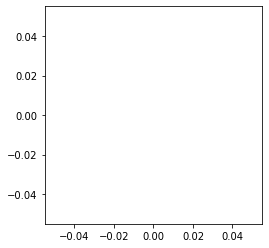

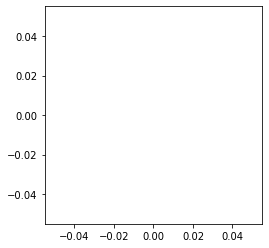

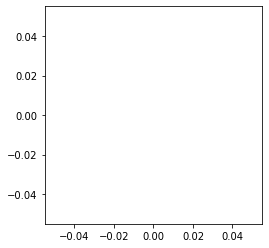

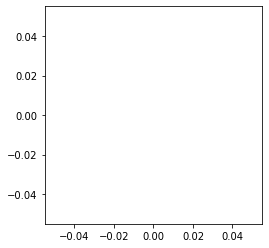

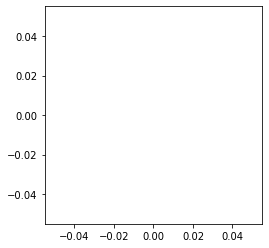

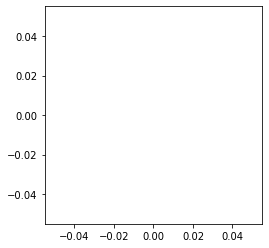

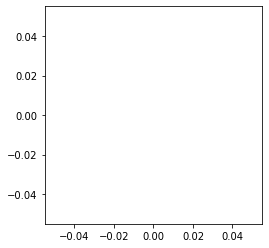

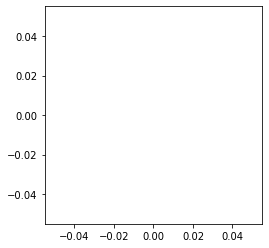

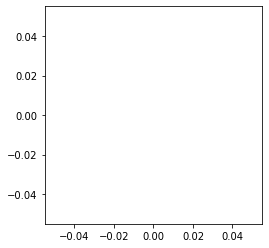

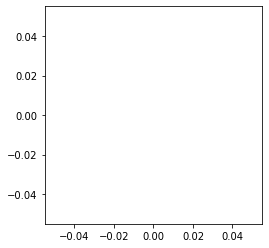

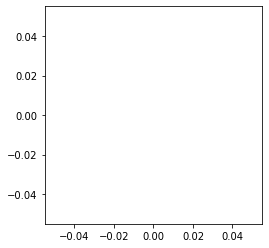

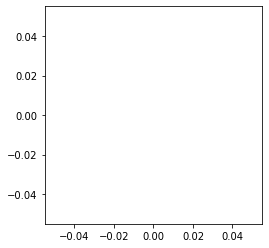

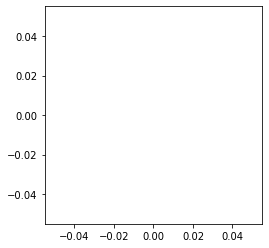

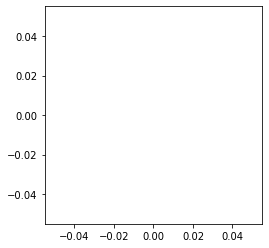

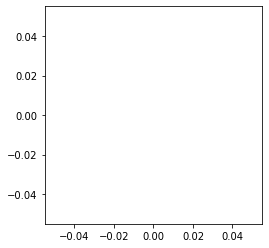

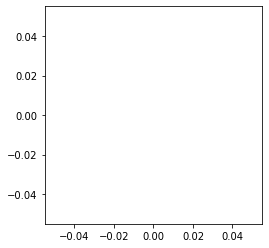

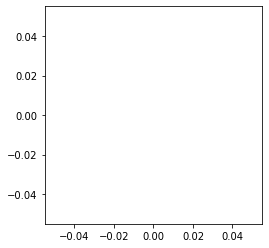

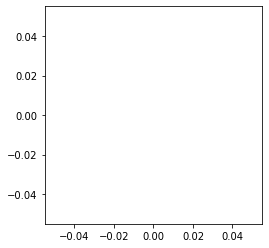

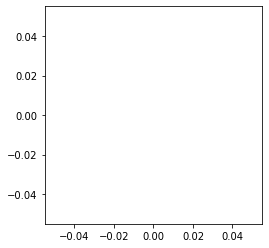

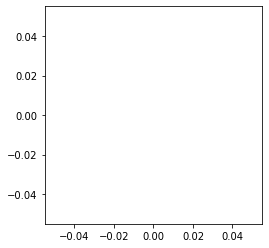

KeyboardInterrupt: 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alfa = 0.02
l = 1
t_final = 6
quantidade_de_pontos = 11
x = np.linspace(0, l, quantidade_de_pontos)

delta_t = 0.1
delta_x = l / quantidade_de_pontos
quantidade_de_passos_de_tempo = int(t_final / delta_t) + 1
t = np.linspace(0, t_final, quantidade_de_passos_de_tempo)
linhas = quantidade_de_pontos - 2
colunas = quantidade_de_pontos - 2

v = (alfa * delta_t) / (delta_x ** 2)

u_num = np.zeros((quantidade_de_passos_de_tempo + 4, quantidade_de_pontos))
u_old = np.zeros(quantidade_de_pontos)
u_new = np.zeros(quantidade_de_pontos)

A = np.zeros((linhas + 1, colunas + 1))
C = np.zeros(linhas)

u_old[:] = 100 * np.sin(np.pi * x / l)
u_num[0, :] = u_old
u_new[:] = u_old

for i in range(0, linhas):
    A[i, i - 1] = -v
    A[i, i] = 1 + 2 * v
    A[i, i + 1] = -v
A = np.delete(A, (-1), axis=0)
A = np.delete(A, (-1), axis=1)

for n in range(0, quantidade_de_passos_de_tempo - 1):
    C[:] = u_old[1:-1]
    C[0] = u_old[1] + v * u_old[0]
    C[-1] = u_old[-2] + v * u_old[-1]

    # thomas ...

    u_new[1:-1] = np.linalg.solve(A, C)
    u_num[n + 1, :] = u_new
    u_old = u_new

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
for i in range(quantidade_de_passos_de_tempo):
    ax.scatter3D(x, t[i], u_num[i], color='red')
    plt.pause(0.1)
    plt.axis('scaled')
plt.show()


In [ ]:
# Library

import numpy                           
from matplotlib import pyplot     



# Grid Generation

nx = 200
ny = 200                                    
dx = 2 / (nx-1)
dy = 2 / (ny-1)

# Time Step

nt = 50                                                                   
alpha = 1                                 
dt = 0.001                     

# Initial Condition (I.C) and Boundry Condition (B.C)

T = numpy.ones((nx, ny))                         # I.C (U = Velocity)
x = numpy.linspace(0,2,nx)                       # B.C
y = numpy.linspace(0,2,ny)                       # B.C

Tn = numpy.empty_like(T)                         #initialize a temporary array
X, Y = numpy.meshgrid(x,y)

T[0, :] = 20          #  B.C
T[-1,:] = -100        #  B.C
T[:, 0] = 150         #  B.C
T[:,-1] = 100         #  B.C
# Solver
###Run through nt timesteps
    
for n in range(nt + 1): 
    Tn = T.copy()
        
    T[1:-1, 1:-1] = (Tn[1:-1,1:-1] + 
                        ((alpha * dt / dx**2) * 
                        (Tn[1:-1, 2:] - 2 * Tn[1:-1, 1:-1] + Tn[1:-1, 0:-2])) +
                        ((alpha * dt / dy**2) * 
                        (Tn[2:,1: -1] - 2 * Tn[1:-1, 1:-1] + Tn[0:-2, 1:-1])))
        
    T[0, :] = 20          # From B.C
    T[-1,:] = -100        # From B.C
    T[:, 0] = 150         # From B.C
    T[:,-1] = 100         # From B.C

   
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, T)
pyplot.colorbar()
pyplot.contour(X, Y, T)
pyplot.xlabel('X')
pyplot.ylabel('Y');